# **Exploratory Data Analysis (EDA)** 
#  *Airline Passenger Satisfaction*


## Business Problem

To perform exploratory data analysis in order to find what affects the experience of airline passengers

## **Importing libraries**

In [ ]:
import pandas as pd #data processing
import numpy as np #linear algebra

#libraries for data visualisations
import seaborn as sns 
import matplotlib.pyplot as plt



%matplotlib inline

#plt.style.use('bmh')
pd.options.display.float_format = '{:.3f}'.format

## **Reading data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/airline_passenger_satisfaction.csv') #path to the dataset file


## **Data Information**

In [ ]:
#printing first 5 rows of the dataset
df.head() 

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.000,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.000,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.000,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.000,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.000,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
 #printing last five rows of the dataset
 df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.000,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.000,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.000,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.000,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.000,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [ ]:
#Printing the shape of the Dataframe
print(df.shape)



(129880, 24)


This dataset has 1,29,880 rows and 24 columns





In [ ]:
#Printing the list of columns in the Dataframe
print(df.columns)

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [ ]:
#Number of unique values of all columns
df.nunique()

ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

In [ ]:
#Understanding the content of all unique values
print(df.apply(lambda col: col.unique()))

ID                                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                                       [Male, Female]
Age                                       [48, 35, 41, 50, 49, 43, 60, 38, 28, 27, 24, 9...
Customer Type                                                       [First-time, Returning]
Type of Travel                                                         [Business, Personal]
Class                                                     [Business, Economy, Economy Plus]
Flight Distance                           [821, 853, 1905, 3470, 3788, 1963, 2607, 2822,...
Departure Delay                           [2, 26, 0, 13, 20, 16, 68, 4, 12, 6, 22, 23, 5...
Arrival Delay                             [5.0, 39.0, 0.0, 1.0, 3.0, 21.0, 30.0, 76.0, 2...
Departure and Arrival Time Convenience                                   [3, 2, 4, 1, 5, 0]
Ease of Online Booking                                                   [3, 2, 

# **Checking Null Values**

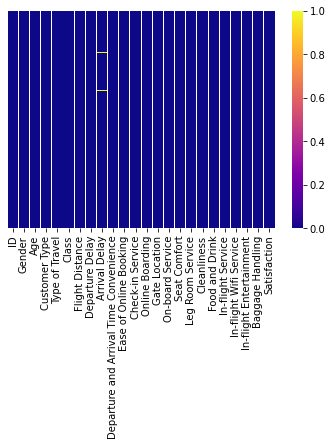

In [ ]:
sns.heatmap ( df.isnull (),  yticklabels= False ,  cbar= True ,  cmap= 'plasma' )

In [ ]:
#Finding the sum of Missing Values in the dataset
nof_missing=df.isnull().sum()
nof_missing


ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [ ]:
#creating a new column called total and storing the sorted list of missing values in descending order
total = nof_missing.sort_values(ascending=False)
#creating a new column called percent and storing a sorted list of the percentage of missing values
percent = (nof_missing/df.isnull().count()).sort_values(ascending=False) 
#created a dictonary called missing which has total and percent as keys
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Arrival Delay,393,0.003
ID,0,0.000
Gate Location,0,0.000
Baggage Handling,0,0.000
In-flight Entertainment,0,0.000
In-flight Wifi Service,0,0.000
In-flight Service,0,0.000
Food and Drink,0,0.000
Cleanliness,0,0.000
Leg Room Service,0,0.000


It is not required to drop the missing values as it only consists of 0.003% of the dataset

# Checking Duplicate values

In [ ]:
#Finding Duplicate rows in the dataframe
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (0, 24)


# Checking Statistics for different data types

In [ ]:
#printing the column names and their data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
#Checking statistics for columns of the int64 data type
df.describe(include=['int64'])

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000,129880.000
mean,64940.500,39.428,1190.316,14.714,3.058,2.757,3.306,3.253,2.977,3.383,3.441,3.351,3.286,3.205,3.642,2.729,3.358,3.632
std,37493.271,15.119,997.452,38.071,1.527,1.402,1.266,1.351,1.279,1.287,1.319,1.316,1.314,1.330,1.177,1.329,1.334,1.180
min,1.000,7.000,31.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,32470.750,27.000,414.000,0.000,2.000,2.000,3.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000,2.000,3.000
50%,64940.500,40.000,844.000,0.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,3.000,3.000,4.000,3.000,4.000,4.000
75%,97410.250,51.000,1744.000,12.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,4.000,4.000,4.000,5.000,4.000,4.000,5.000
max,129880.000,85.000,4983.000,1592.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000


In [ ]:
#Checking statistics for columns of the object data type
df.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


In [ ]:
#Checking statistics for columns of the float64 data type
df.describe(include=['float64'])

,Arrival Delay
count,129487.000
mean,15.091
std,38.466
min,0.000
25%,0.000
50%,0.000
75%,13.000
max,1584.000


# Checking for outliers

In [ ]:
#As detection of outliers can only be applied to numerical values a new dataframe called df_outlier has been created which only has numeric data type. 
df_outlier = df.select_dtypes(exclude='object').columns.to_list()
df_outlier

['ID',
 'Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [ ]:
df_feature=df_outlier[0:5]
df_feature

['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

A new list of first few attributes was created as the rest of the attributes are customer survey containing ratings from 0-5.

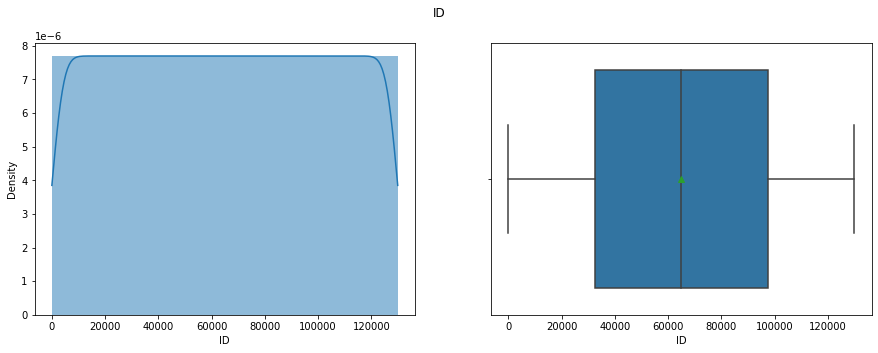

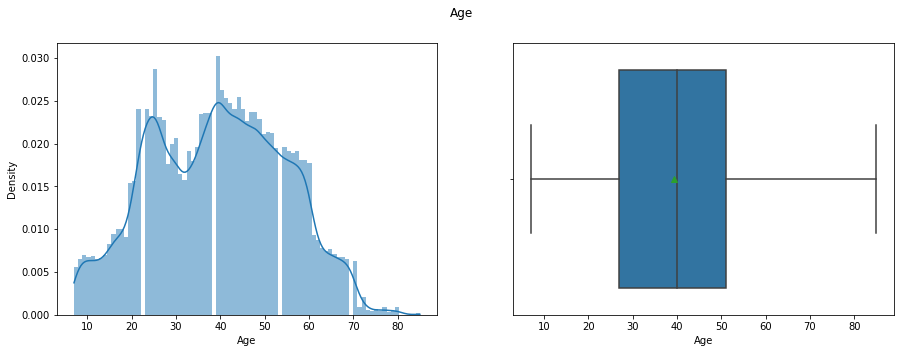

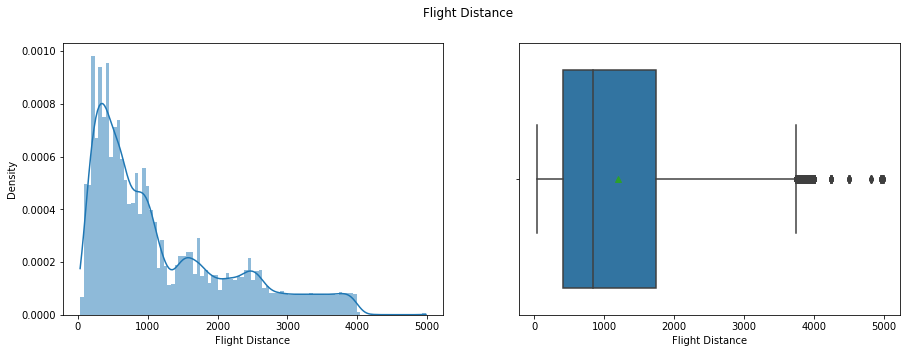

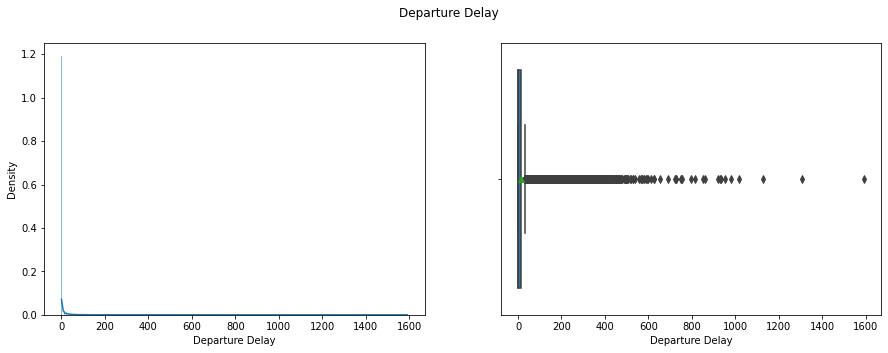

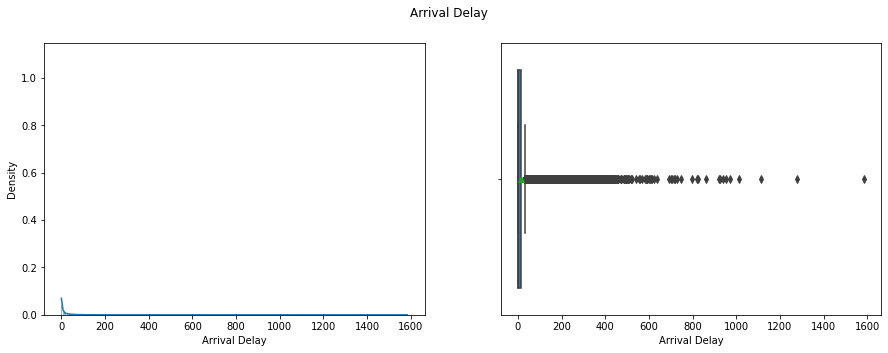

In [ ]:
#Box plot and Distribution plot
outl=df_feature
for x in outl:
    fig, axes=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(x=df[x], ax=axes[0], kde=True, stat="density", linewidth=0)
    sns.boxplot(x=df[x], ax=axes[1], showmeans=True)
    fig.suptitle(x)

Observation: There are no outliers in ID and Age attribute but we can see some outliers in Flight Distance, Arrival Delay and Departure Delay.



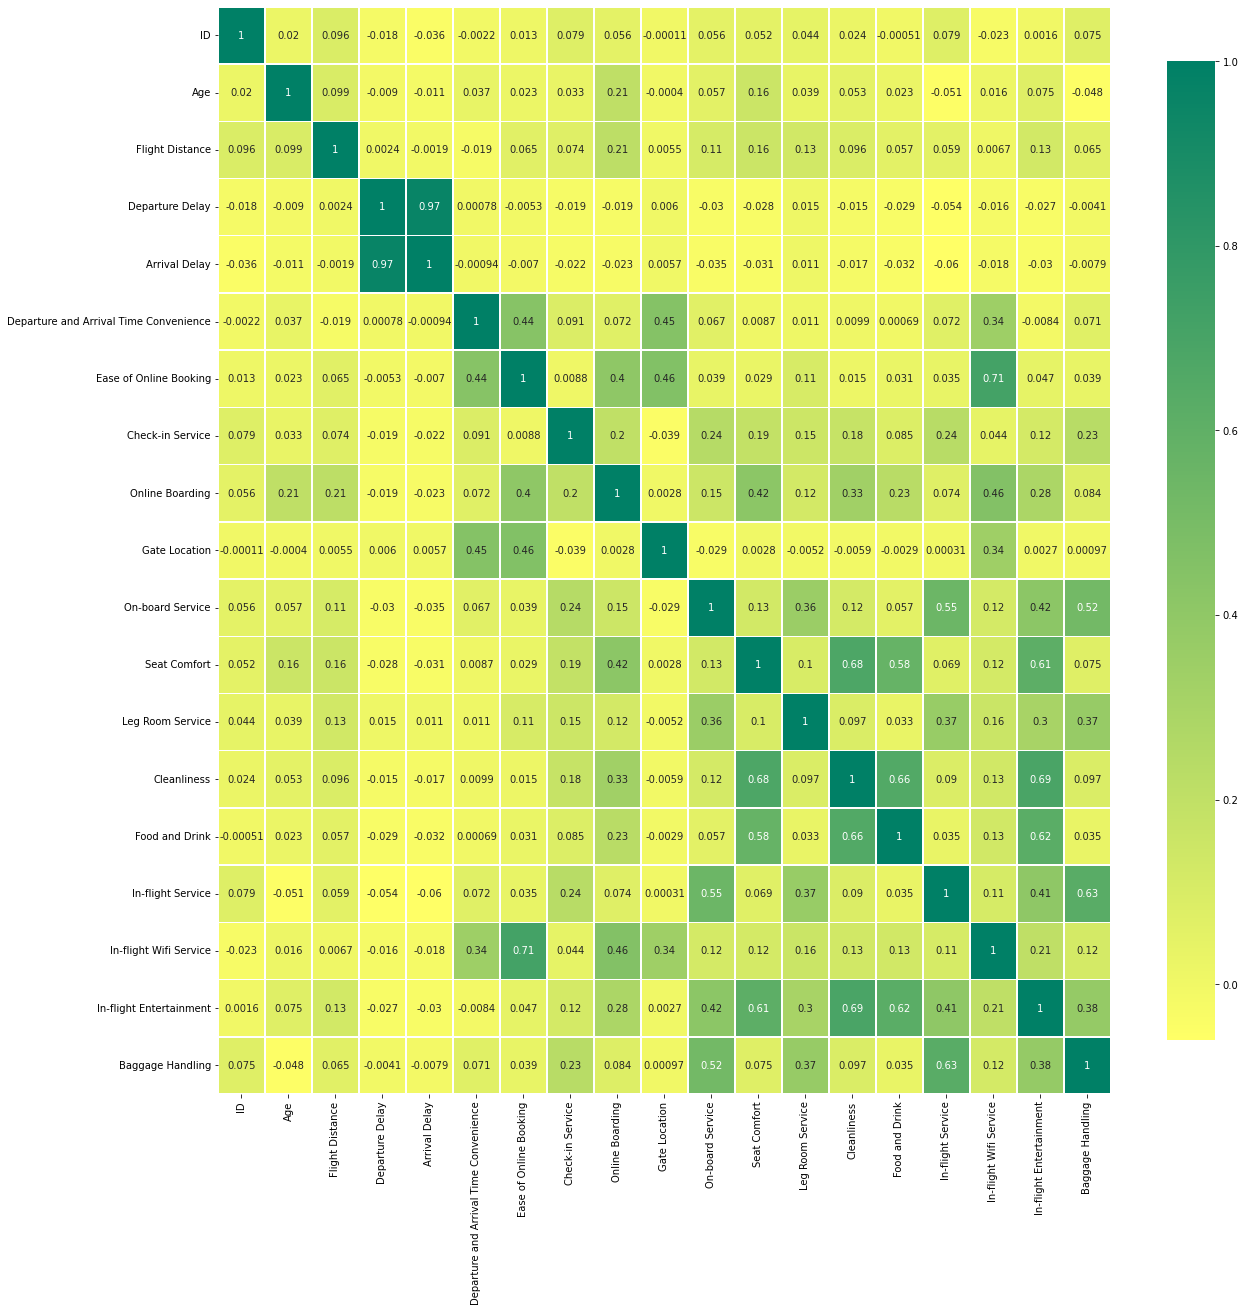

In [ ]:

corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap = 'summer_r', linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Arrival Delay" and "Departure Delay" are highly correlated too.But no pair is having correlation coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.

# **Data Visualisation**

## *Overview*

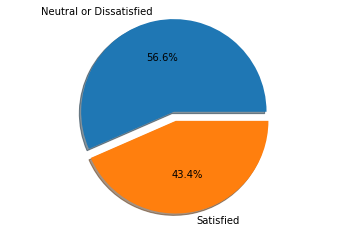

In [ ]:
# Plotting a Pie Chart for satisfaction percentage
labels = ['Neutral or Dissatisfied','Satisfied']

sizes = [df['Satisfaction'].value_counts()[0],
         df['Satisfaction'].value_counts()[1]]
explode=[0.1,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
ax1.axis('equal')
plt.show()

Observation: 56.6% customers are neutral or dissatisfied with theservice provided by the airlines.

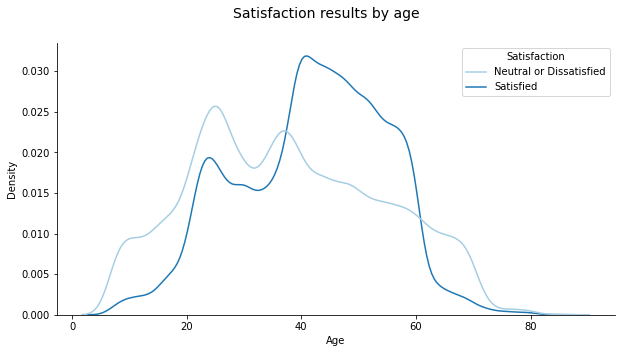

In [ ]:

plt.figure(figsize = (10,5))
sns.kdeplot(data = df, x= "Age", hue = "Satisfaction", common_norm = False, palette ="Paired")
plt.suptitle("Satisfaction results by age", fontsize = 14,)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation: Average customer age is appoximately 40 years and customers between 40 to 60 years are most likely to find the service satisfactory.

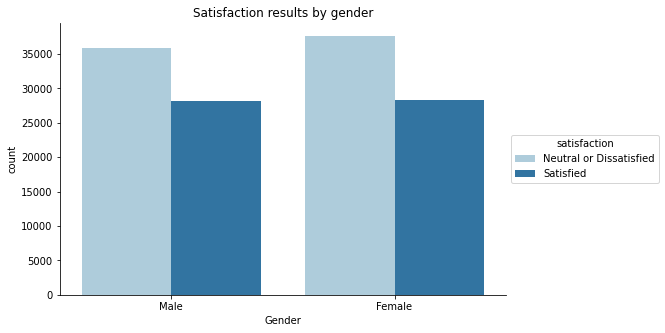

In [ ]:

plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="Satisfaction", palette ="Paired" )

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Both the genders have almost the even rate of dissatisfaction with the services.

## *Demography*

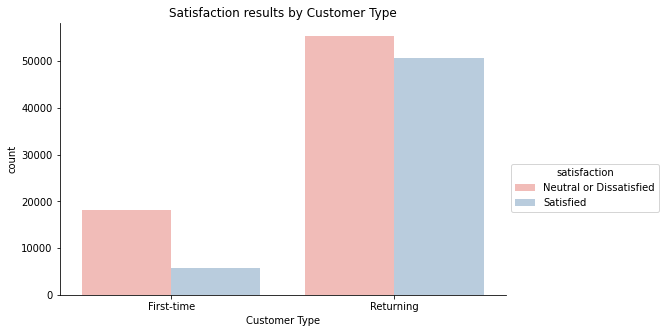

In [ ]:

plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = df, hue ="Satisfaction",palette ="Pastel1" )
try:
  plt.title("Satisfaction results by Customer Type")
  sns.despine(top = True, right = True, left = False, bottom = False)
  plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
except ValueError as e:
  print("Wrong legend location",e)
  plt.show()

Observation: Both the first time as well as the returning customers are not satisfied with the airline service.

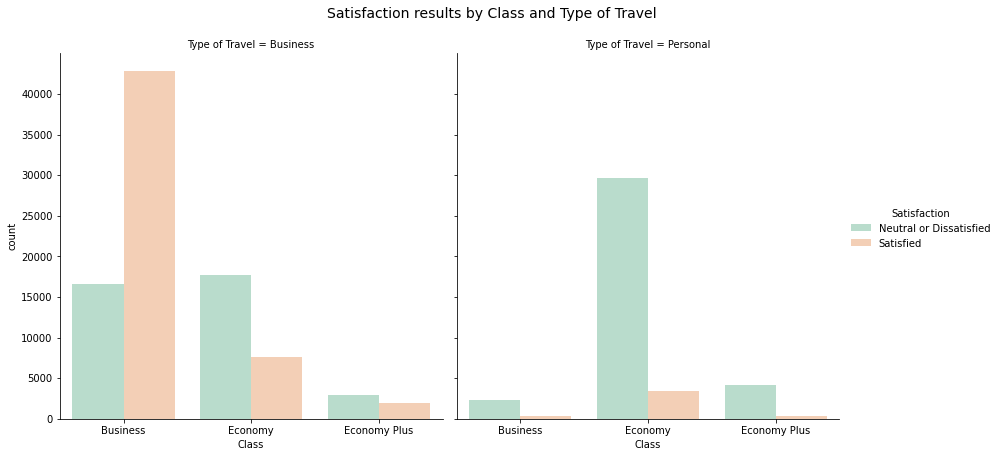

In [ ]:
sns.catplot( x ="Class", hue ="Satisfaction", kind = "count", col = "Type of Travel", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation1: Passenger travelling for business purposes are more satisfied with the service as compared to people travelling for personal purposes.


Observation2: Business class passengers travelling for business purposes are satisfied with the services whereas economy class passengers travelling for personal purposes are highly dissatisfied.

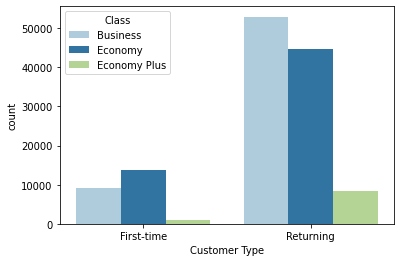

In [ ]:
sns.countplot(x = 'Customer Type',  data = df, hue="Class",palette ="Paired")

Observation: Loyal/Returning passengers are mostly customers travelling through Business Class followed by Economy and Economy plus.

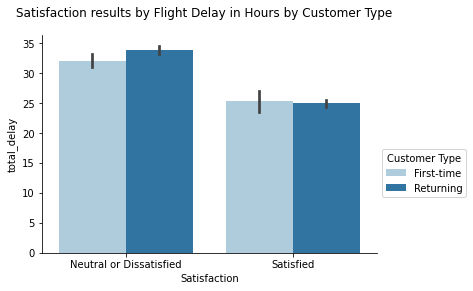

In [ ]:
#Converting arrival and departure delay from minutes to hours for better interpretation.
df["Departure_delay_hr"] = round(df["Departure Delay"]/60,1)
df["Arrival_delay_hr"] = round(df["Arrival Delay"]/60,1).fillna(0)
delay = df[["Departure_delay_hr","Arrival_delay_hr"]]
df['total_delay']= df['Arrival Delay']+ df["Departure Delay"]
sns.barplot(x = 'Satisfaction',  data = df,y="total_delay", hue="Customer Type",palette ="Paired")
plt.suptitle("Satisfaction results by Flight Delay in Hours by Customer Type")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation: Returning passengers are more dissatisfied with the delay in flights than first time passengers.

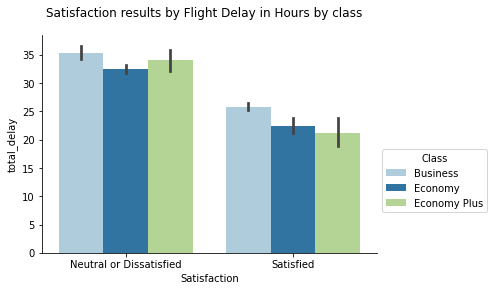

In [ ]:
sns.barplot(x = 'Satisfaction',  data = df,y="total_delay", hue="Class",palette ="Paired")
plt.suptitle("Satisfaction results by Flight Delay in Hours by class")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "Class")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Observation: Passengers travelling from all classes are dissatisfied but Business Class people are more dissatisfied.

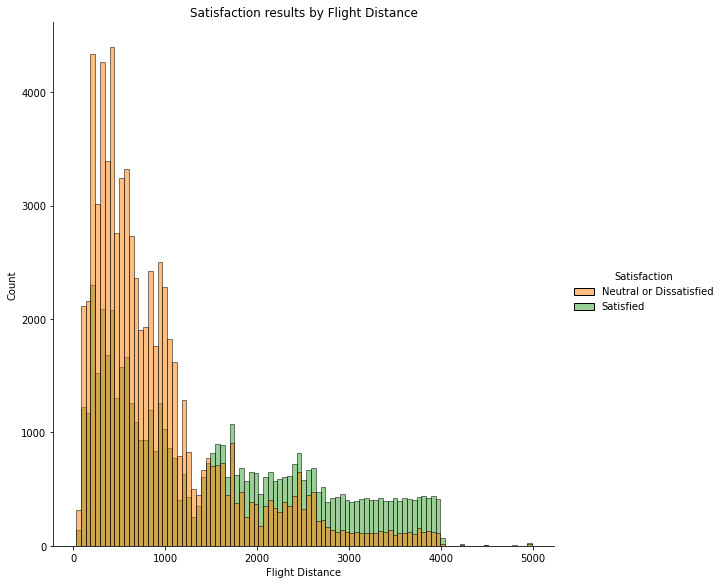

In [ ]:
sns.displot(x = "Flight Distance", data = df, hue ="Satisfaction", height = 8,palette ="Paired_r"  )
plt.title("Satisfaction results by Flight Distance")
plt.show()

Observation: Passengers flying in long distance flights are more satisfied whereas passengers travelling for short distance are highly dissatisfied.

## Services

Ease of Online Booking

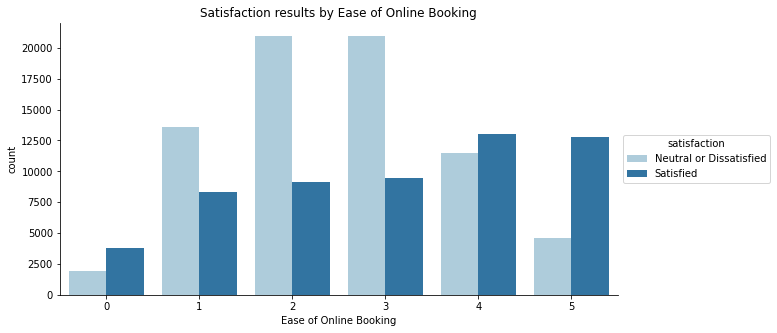

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Ease of Online Booking", data = df, hue ="Satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Ease of Online Booking")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: The overall satisfaction increases as the rating increases which means people who were overall satisfied with the booking service were likely to rate overall service satisfactory.

Check-in Service

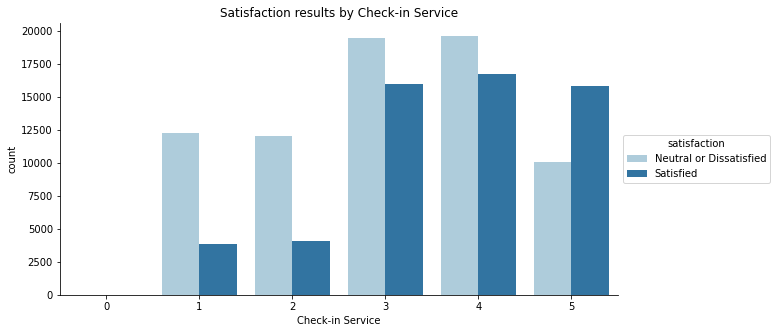

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Check-in Service", data = df, hue ="Satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Check-in Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Check-in Service has overall less impact on overall satisfaction, as even on score 4 passengers have rated dissatisfaction

Online Boarding

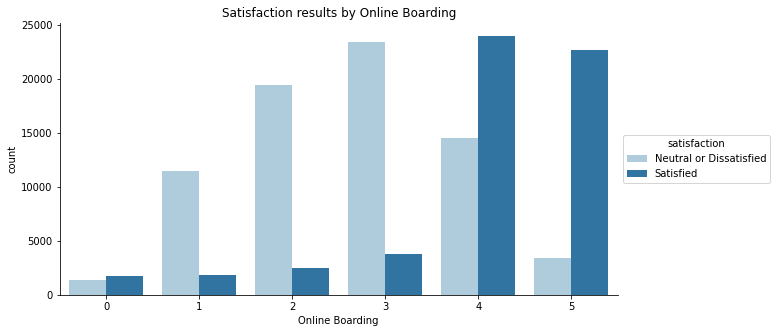

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Online Boarding", data = df, hue ="Satisfaction",palette ="Paired" )

plt.title("Satisfaction results by Online Boarding")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: As the scores for online bookings increase, the overall dissatisfaction appears to decrease. 

Seat Comfort

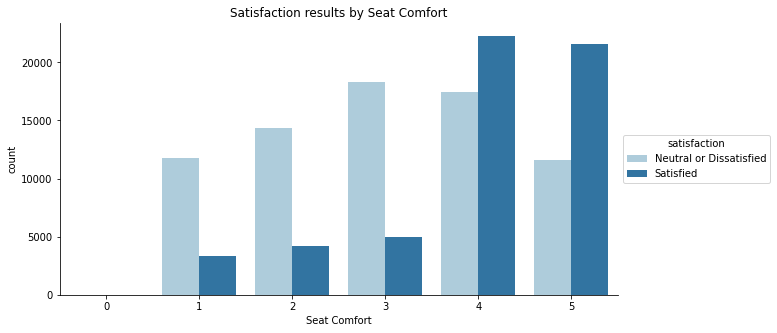

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Seat Comfort", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Seat Comfort")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: As the rating increases the overall dissatisfaction also decreases, people who voted overall seats extremely comfortable also voted the overall services satisfactory.

Leg Room Service

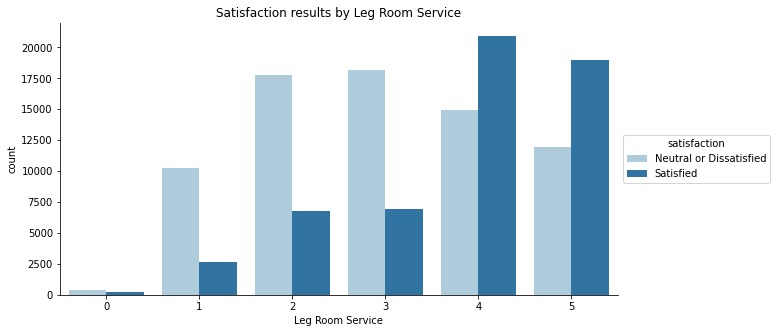

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Leg Room Service", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Leg Room Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Follows a similar pattern as Seat Comfort

Cleanliness

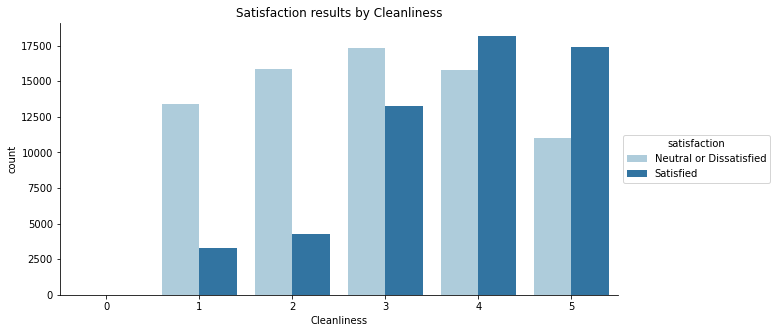

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Cleanliness", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: While cleanliness is important it is not a critical factor defining the satisfaction of the people.

Food and Drink

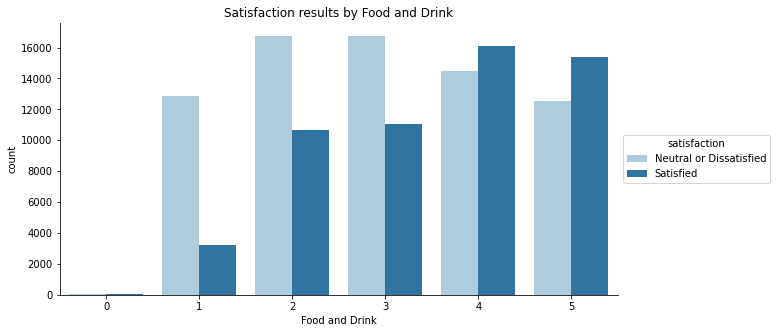

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Food and Drink", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Food and Drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: Increased ratings shows a decrease in the overall dissatisfaction of the service, but not too impactful.

In-flight Service

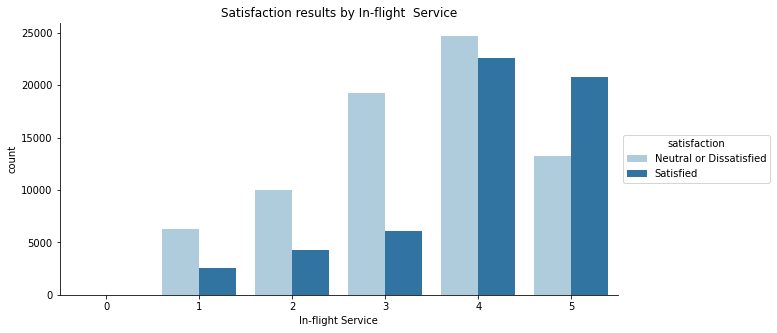

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="In-flight Service", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight  Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction") 

plt.show()

Observation: A similar trend can be seen as the seat comfort and leg room service, as the experience gets better the customers are more satisfied

In-flight Wifi Service

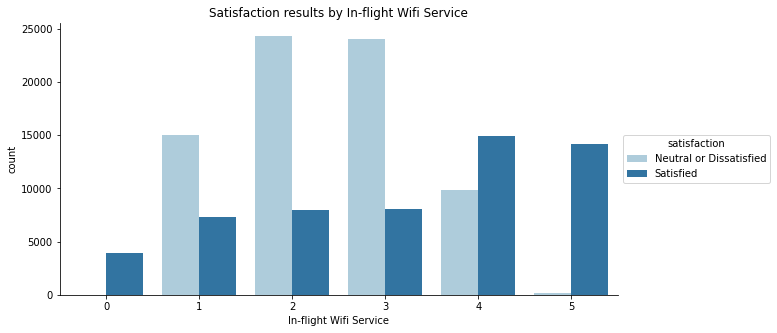

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="In-flight Wifi Service", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight Wifi Service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: As the rating increases the dissatisfaction completely drps and a huge drop can be seen from 3/4.

In-flight Entertainment

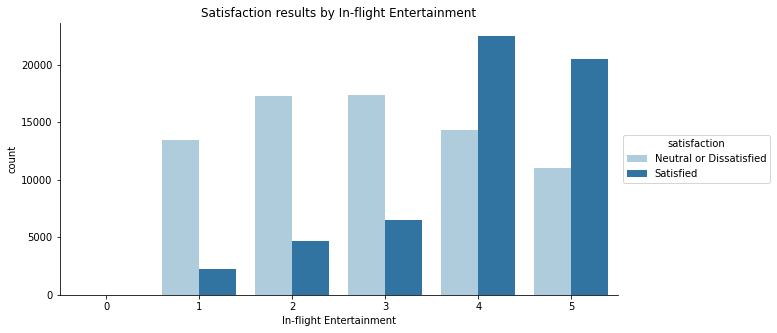

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="In-flight Entertainment", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by In-flight Entertainment")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: This service also follows a similar trend to seat comfort services

Baggage Handling

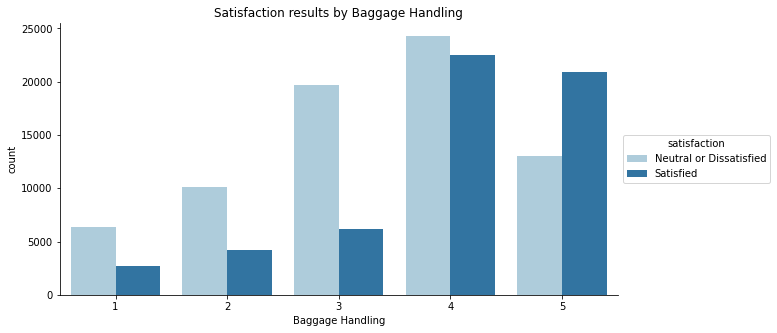

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Baggage Handling", data = df, hue ="Satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Baggage Handling")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Observation: A similar trend can be seen, as the rating increases the dissatisfaction decreases.

#Few Important services to look into as per our business problem.

##Inflight Wifi Service

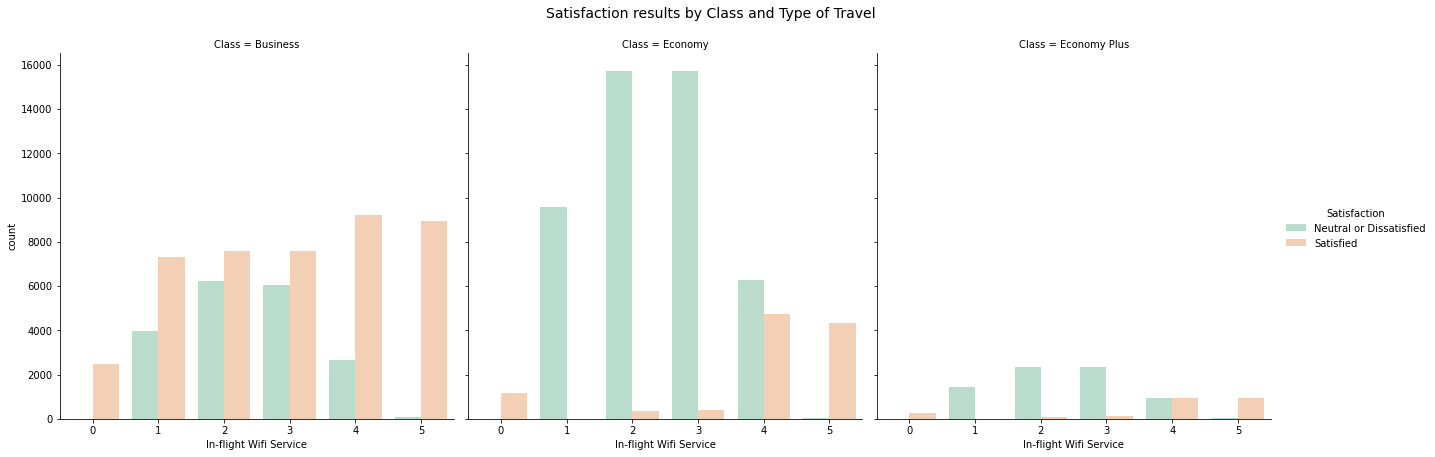

In [ ]:
sns.catplot( x ="In-flight Wifi Service", hue ="Satisfaction", kind = "count", col = "Class", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

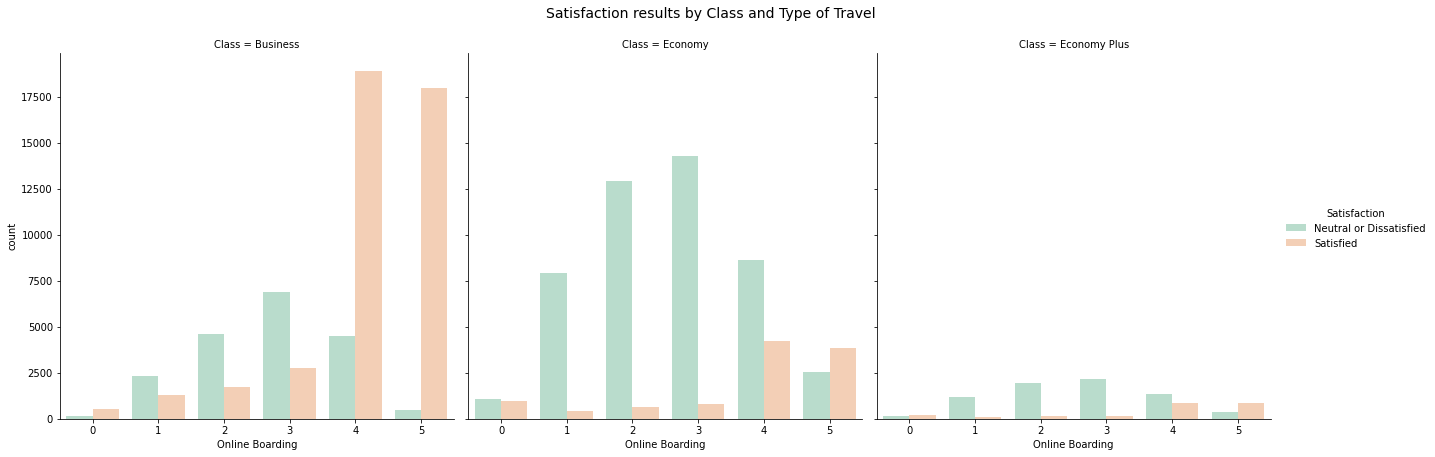

In [ ]:
sns.catplot( x ="Online Boarding", hue ="Satisfaction", kind = "count", col = "Class", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

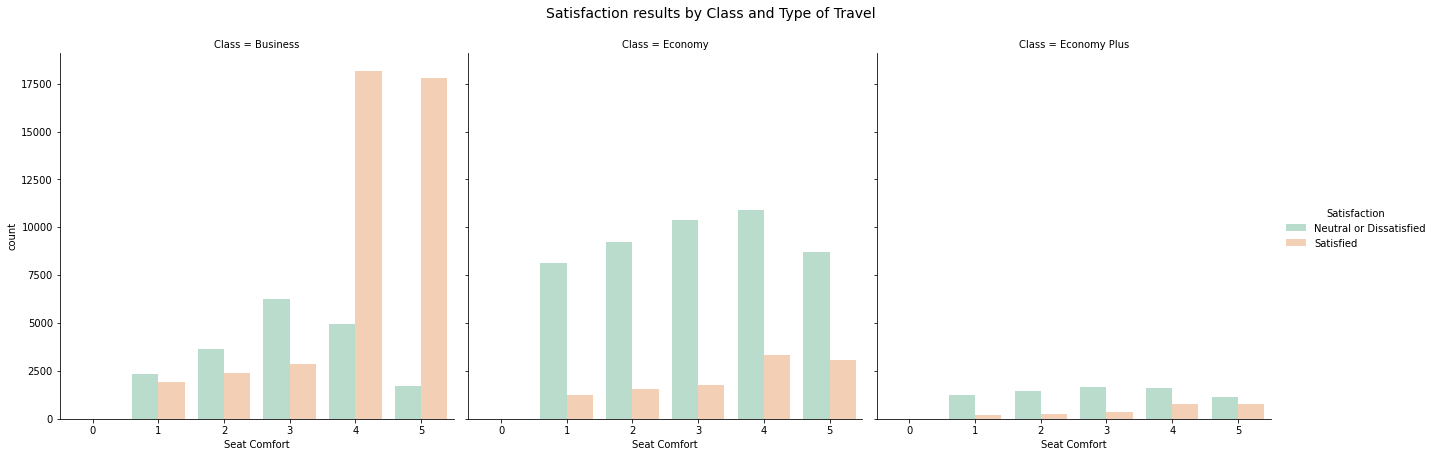

In [ ]:
sns.catplot( x ="Seat Comfort", hue ="Satisfaction", kind = "count", col = "Class", 
            data = df ,palette ="Pastel2", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

In [ ]:
#Few parameters were collected into a list called external factors and the total percent score was evaluated

external_facts=df[['Ease of Online Booking','Gate Location', 'Online Boarding', 'Departure and Arrival Time Convenience','Check-in Service','Baggage Handling']]
df["Total_escore"] = external_facts.sum(axis = 1)
max_score = len(external_facts.columns)*6
df["Total_escore_percent"] = round((df["Total_escore"]/max_score)*100,1)

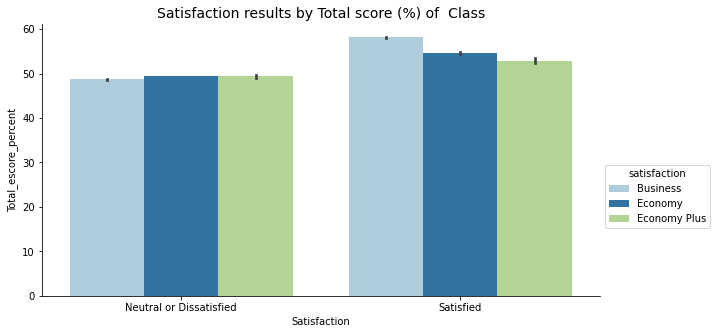

In [ ]:


plt.figure(figsize = (10,5))
sns.barplot(x = 'Satisfaction',  data = df,y="Total_escore_percent", hue="Class",palette ="Paired")
plt.title("Satisfaction results by Total score (%) of  Class", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='best',bbox_to_anchor=(1, 0.5), title = "satisfaction")
plt.show()

Observation: Overall, passengers are satisfied with the external factors with people flying Business class being 59% satisfied.

In [ ]:
internal_facts=df[['On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment']]
df["Total_iscore"] = internal_facts.sum(axis = 1)
max_score = len(internal_facts.columns)*8
df["Total_iscore_percent"] = round((df["Total_iscore"]/max_score)*100,1)

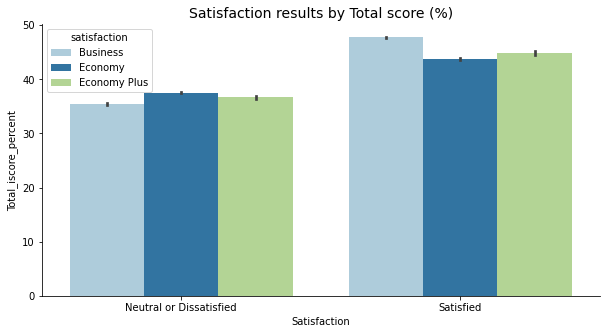

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Satisfaction',  data = df,y="Total_iscore_percent", hue="Class",palette ="Paired")
plt.title("Satisfaction results by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='best', title = "satisfaction")
plt.show()